# Try the dynamic plotting module

In [1]:
import numpy as np
from scenewalk.scenewalk_model_object import scenewalk as scenewalk_obj
from scenewalk.plotting import sw_plot as swplt
from matplotlib import pyplot as plt
from collections import OrderedDict
from scenewalk.utils import loadData

load data

In [4]:
dataDict = loadData.load_data("corpus_all")
#dataDict = loadData.shorten_set(dataDict, 5)
x_dat, y_dat, dur_dat, im_dat, dens_dat, d_range = loadData.dataDict2vars(dataDict)

get one trial

In [5]:
vp = 5
trial = 86
nfixes = 11
x_path = x_dat[vp-1][trial-1][0:nfixes]
y_path = y_dat[vp-1][trial-1][0:nfixes]
dur_path = dur_dat[vp-1][trial-1][0:nfixes]
im = im_dat[vp-1][trial-1][0]
fix_density_map = dens_dat[im-1]

In [6]:
im_file = "/Users/lisa/Documents/SFB1294_B05/SceneWalk/SceneWalk_research/DATA/corpusData/corpus_images/%02d.jpg" % (im,)
from PIL import Image
myImage = Image.open(im_file);
myImage = myImage.convert('LA')
im_sz = myImage.size
im_x = im_sz[0]
im_y = im_sz[1]

In [10]:
kwargs_d = {"saclen_shift":True}
sw_args = ['subtractive', 'zero','both', 'off', 'off', {'x': d_range[0], 'y': d_range[1]}, kwargs_d]

In [11]:
sw_params = OrderedDict({
    "omegaAttention" : 5,
    "omegaInhib" : 0.5,
    "sigmaAttention" : 5,
    "sigmaInhib" : 3,
    "gamma" : 1,
    "lamb" : 1,
    "inhibStrength" : 0.3,
    "zeta" : 0.007,
    "sigmaShift" : 2,
    "shift_size" : 0.5,
    "first_fix_OmegaAttention" : 0.5,
    "cb_sd_x" : 7,
    "cb_sd_y" : 5
})


In [12]:
sw = scenewalk_obj(*sw_args)
print(sw.whoami())
sw.get_param_list_order()

I am a subtractive scenewalk model, initialized with zero activation, in 2 exponents mode, using a presaccadic shift, using a postsaccadic shift, with eta=saclen


['omegaAttention',
 'omegaInhib',
 'sigmaAttention',
 'sigmaInhib',
 'gamma',
 'lamb',
 'inhibStrength',
 'zeta',
 'sigmaShift',
 'shift_size']

In [13]:
sw.update_params(sw_params)
sw.get_params()

OrderedDict([('omegaAttention', 5),
             ('omegaInhib', 0.5),
             ('sigmaAttention', 5),
             ('sigmaInhib', 3),
             ('gamma', 1),
             ('lamb', 1),
             ('inhibStrength', 0.3),
             ('zeta', 0.007),
             ('sigmaShift', 2),
             ('shift_size', 0.5)])

1
2
3
4
5
6
7
8
9
10
animating
saving
showing


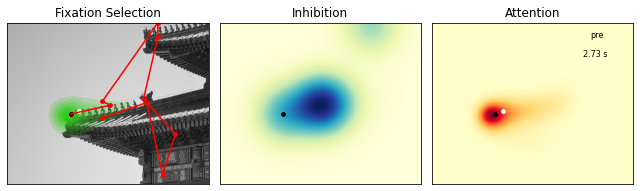

In [16]:
swplt.plot_dynamic_shifts_image(sw, fix_density_map, x_path, y_path, dur_path, "extended_sw.mp4", myImage, 130)

Somehow notebooks always fail at showing the video clip. You can find it under demo/extended_sw.mp4